In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ensure plots show
%matplotlib inline


In [ ]:


df = sns.load_dataset("titanic")
df.shape, df.columns



((891, 15),
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
        'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
        'alive', 'alone'],
       dtype='object'))

In [ ]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# numeric stats
print("Mean age:", df['age'].mean())
print("Median age:", df['age'].median())
print("Max fare:", df['fare'].max())
print("Min fare:", df['fare'].min())

# counts for categorical
print("\nSurvival counts:\n", df['survived'].value_counts())
print("\nClass counts:\n", df['class'].value_counts())
print("\nSex counts:\n", df['sex'].value_counts())


Mean age: 29.69911764705882
Median age: 28.0
Max fare: 512.3292
Min fare: 0.0

Survival counts:
 survived
0    549
1    342
Name: count, dtype: int64

Class counts:
 class
Third     491
First     216
Second    184
Name: count, dtype: int64

Sex counts:
 sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
# drop rows with missing 'survived' or 'sex' if any
df = df.dropna(subset=['survived', 'sex'])
# For plots, we'll drop NA ages where needed


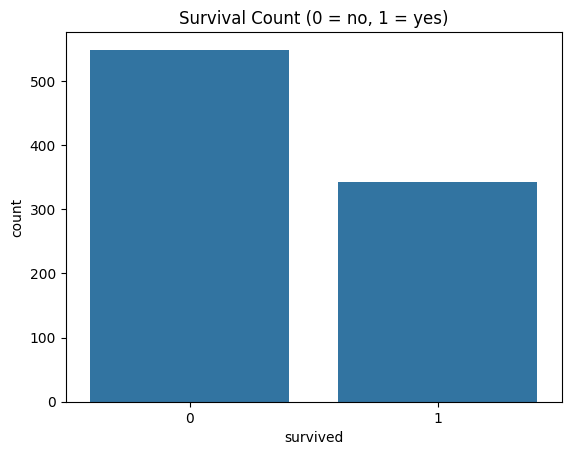

In [ ]:
sns.countplot(x='survived', data=df)
plt.title("Survival Count (0 = no, 1 = yes)")
plt.show()


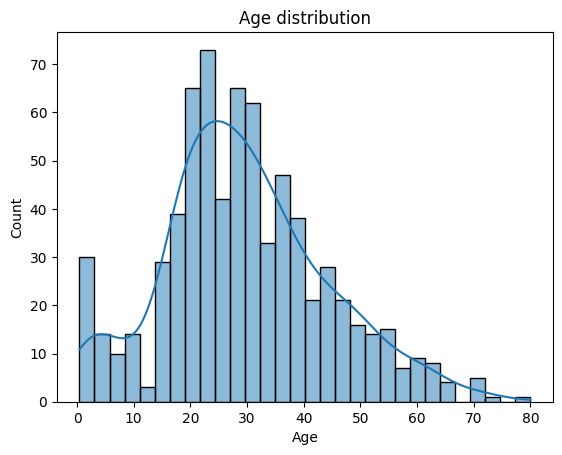

In [ ]:
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title("Age distribution")
plt.xlabel("Age")
plt.show()


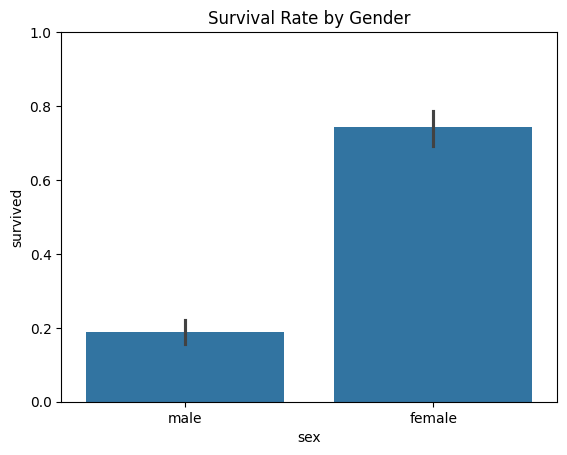

In [ ]:
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.ylim(0,1)
plt.show()



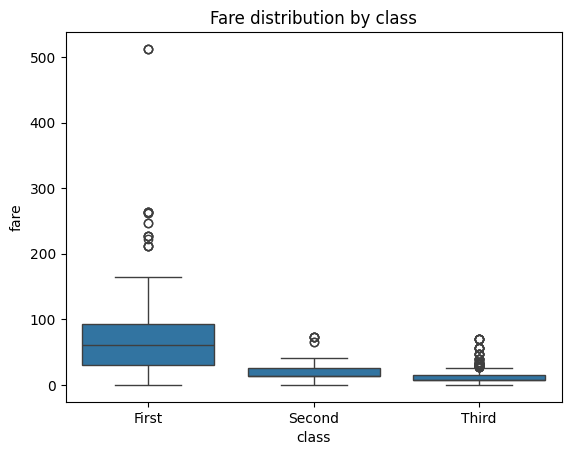

In [ ]:
sns.boxplot(x='class', y='fare', data=df)
plt.title("Fare distribution by class")
plt.show()


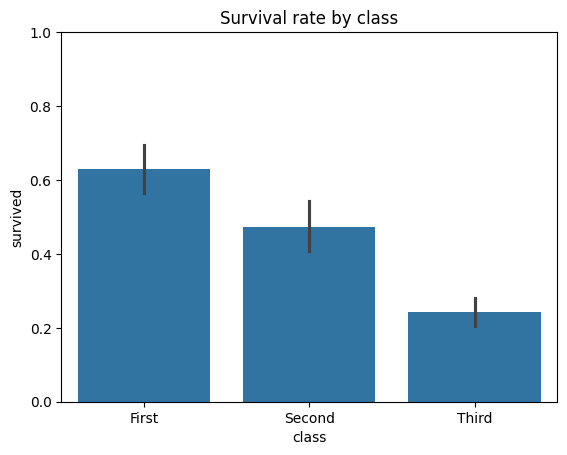

In [ ]:
sns.barplot(x='class', y='survived', data=df)
plt.title("Survival rate by class")
plt.ylim(0,1)
plt.show()


In [ ]:
# Compare survival rates grouped by sex and class
grouped = df.groupby(['class','sex'])['survived'].mean().reset_index()
grouped_pivot = grouped.pivot(index='class', columns='sex', values='survived')
print(grouped_pivot)

# Find any extreme fares
df.sort_values('fare', ascending=False)[['fare','class','sex','age']].head(10)


sex       female      male
class                     
First   0.968085  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


/tmp/ipython-input-3134196316.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['class','sex'])['survived'].mean().reset_index()


,fare,class,sex,age
679,512.3292,First,male,36.0
258,512.3292,First,female,35.0
737,512.3292,First,male,35.0
88,263.0000,First,female,23.0
438,263.0000,First,male,64.0
341,263.0000,First,female,24.0
27,263.0000,First,male,19.0
742,262.3750,First,female,21.0
311,262.3750,First,female,18.0
299,247.5208,First,female,50.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['fare'].plot(kind='hist', bins=20, title='fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='fare', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['fare'].plot(kind='line', figsize=(8, 4), title='fare')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='index', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='fare', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='age', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Observations
1. Females show higher survival rate than males.
2. First class passengers survived more often than second or third class.
3. Younger passengers tended to survive more than older passengers.
4. There are fare outliers (very high fares) mostly in first class.


### Proposed Research / Innovation Idea
- Problem: In many transport disasters, demographic and socio-economic factors correlate with survival.
- Idea: AI-driven evacuation planner that uses seat/location + demographic data to prioritize rescue in a way that reduces overall risk.
- R&D steps:
  1. Build predictive risk models from historical datasets (Titanic + other disaster datasets).
  2. Simulate evacuation strategies in agent-based models.
  3. Iterate the planning algorithm to maximize survival fairness and efficiency.
- Validation: run simulation experiments (with/without planner) and compare survival outcomes, run ablation tests, and perform sensitivity analysis on demographic weights.
